In [9]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pickle
import feather
import os
import matplotlib.pyplot as plt

# matplotlib style
plt.style.use('fivethirtyeight')
# options, figure size:
plt.rcParams['figure.figsize'] = [20, 10]
# get rid of margins:
plt.rcParams['axes.xmargin'] = 0

dataset = input()
path = os.getcwd() +'/Datasets/'+dataset+'/'

banking


## 1) Sentiment for tweets

In [38]:
df = pd.read_feather(path+dataset+'_clean.ftr')

In [4]:
analyzer = SentimentIntensityAnalyzer()

# Create a function to get the VADER polarity
def getPolarityVADER(text):
    score = analyzer.polarity_scores(text)
    polarity = score['pos'] - score['neg']
    return polarity

In [42]:
df['sentiment'] = df['text'].apply(getPolarityVADER)

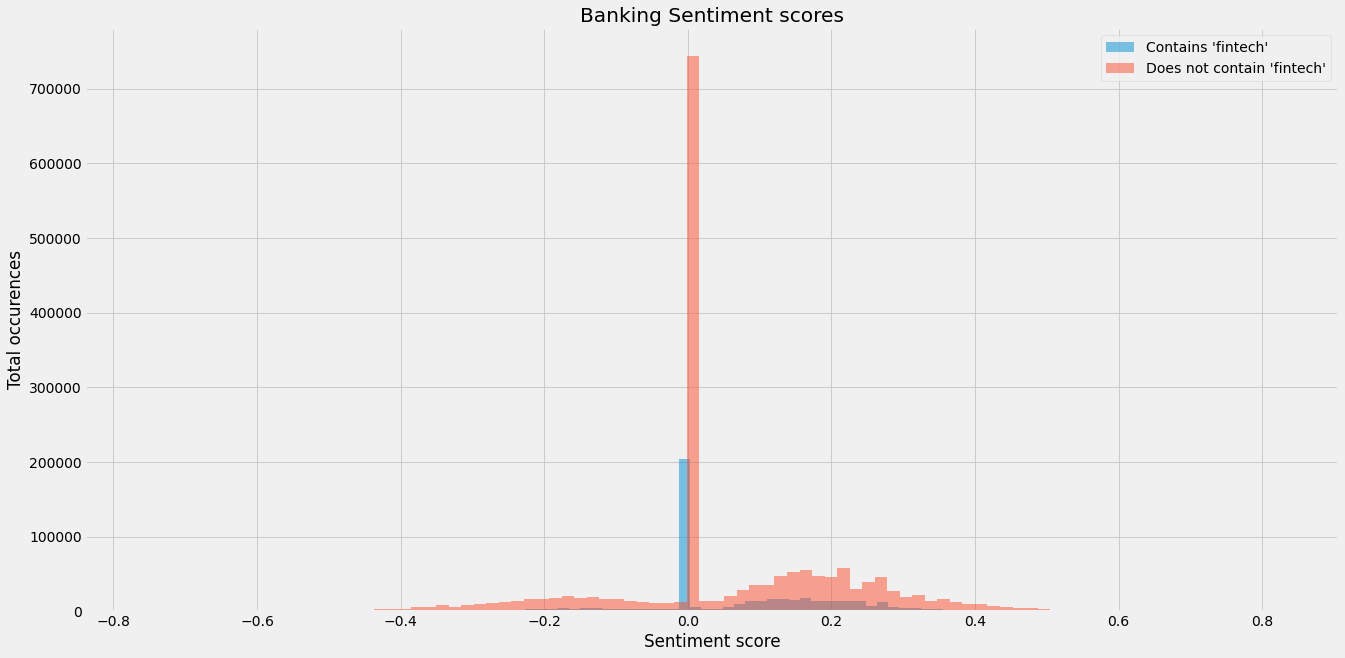

In [67]:
plt.hist(df[df.fintech==True].sentiment, bins = 100, alpha=0.5, label="Contains 'fintech'")
plt.hist(df[df.fintech==False].sentiment, bins = 100, alpha=0.5, label="Does not contain 'fintech'")

plt.xlabel('Sentiment score')
plt.ylabel('Total occurences')
plt.title('Banking Sentiment Scores')
plt.legend()

plt.savefig(path+dataset+'_sentiment.pdf')
plt.show()

In [116]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < -0.05:
        return 'Negative'
    elif score > 0.05:
        return 'Positive'
    else:
        return 'Neutral'

# Save the positive, neutral and negative values
def polarity(df):
    postweets = df[df.analysis == 'Positive'].shape[0]
    negtweets = df[df.analysis == 'Negative'].shape[0]
    neutweets = df[df.analysis == 'Neutral'].shape[0]
    total = df.shape[0]
    
    print('Share of positive tweets:', 
      round((postweets/total)*100, 1))
    print('Share of negative tweets:', 
      round((negtweets/total)*100, 1))
    print('Share of neutral tweets:', 
      round((neutweets/total)*100, 1))
    
    return postweets, negtweets, neutweets, total

In [121]:
print('For tweets associated with fintech: \n')
polarity(df[df.fintech==True])

For tweets associated with fintech: 

Share of positive tweets: 45.8
Share of negative tweets: 9.9
Share of neutral tweets: 44.4


(231252, 49809, 224262, 505323)

In [122]:
print('Banking tweets not associated with fintech: \n')
polarity(df[df.fintech==False])

Banking tweets not associated with fintech: 

Share of positive tweets: 39.7
Share of negative tweets: 15.2
Share of neutral tweets: 45.1


(706484, 271455, 802831, 1780770)

In [ ]:
plt.hist(df[df.fintech==True].sentiment, bins = 100, alpha=0.5, label="Contains 'fintech'")
plt.hist(df[df.fintech==False].sentiment, bins = 100, alpha=0.5, label="Does not contain 'fintech'")

plt.xlabel('Sentiment score')
plt.ylabel('Total occurences')
plt.title('Banking Sentiment Scores')
plt.legend()

#plt.savefig(path+dataset+'_sentiment.pdf')
plt.show()